# Image Classification for a Refund Department

## Import Required Libraries

In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import TensorFlow and Keras for building and training the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Import scikit-learn for additional utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ensure that plots appear inline in the notebook
%matplotlib inline

# Set some options for better display of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# To avoid warnings and clutter in the output
import warnings
warnings.filterwarnings('ignore')

# Check versions ensuring compatibility
print(f"Pandas version: {pd.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Numpy version: {np.__version__}")

2024-08-16 18:24:23.565211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Pandas version: 2.2.2
TensorFlow version: 2.16.2
Numpy version: 1.26.4


## Load the dataset

In [2]:
data = pd.read_csv('fashion-mnist_train.csv')

## Display the shape and first 5 rows.

In [3]:
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

# Data Preprocessing

## Separate the labels and pixel data

In [4]:
labels = data['label'].values
images = data.drop(columns=['label']).values

## Reshape the pixel data into 28x28 images

In [5]:
images = images.reshape(-1, 28, 28, 1)

## Normalize the pixel values

In [6]:
images = images / 255.0

## Plot a image using matplotlib

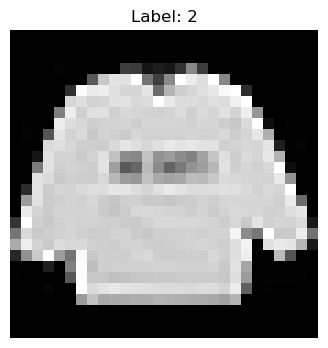

In [7]:
plt.figure(figsize=(4, 4))
plt.imshow(images[0], cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.axis('off')
plt.show()

## Split the data into training, validation and testing sets

In [8]:
X_temp, X_test, y_temp, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

### Output the shapes to confirm the split

In [9]:
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (36000, 28, 28, 1)
Validation data shape: (12000, 28, 28, 1)
Test data shape: (12000, 28, 28, 1)
Training labels shape: (36000,)
Validation labels shape: (12000,)
Test labels shape: (12000,)


## Check the distribution of labels in the training set

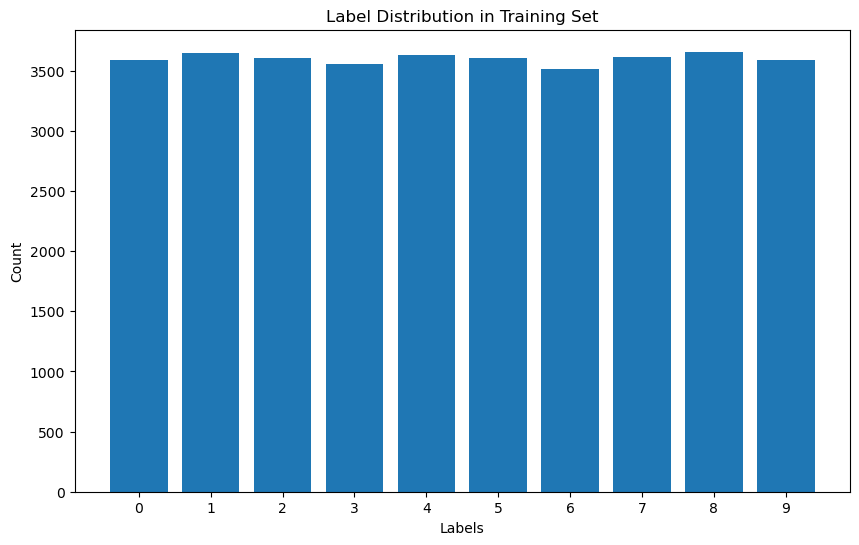

In [10]:
unique_labels, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, tick_label=unique_labels)

plt.title("Label Distribution in Training Set")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

## Visualize a grid of 25 random images from the training set

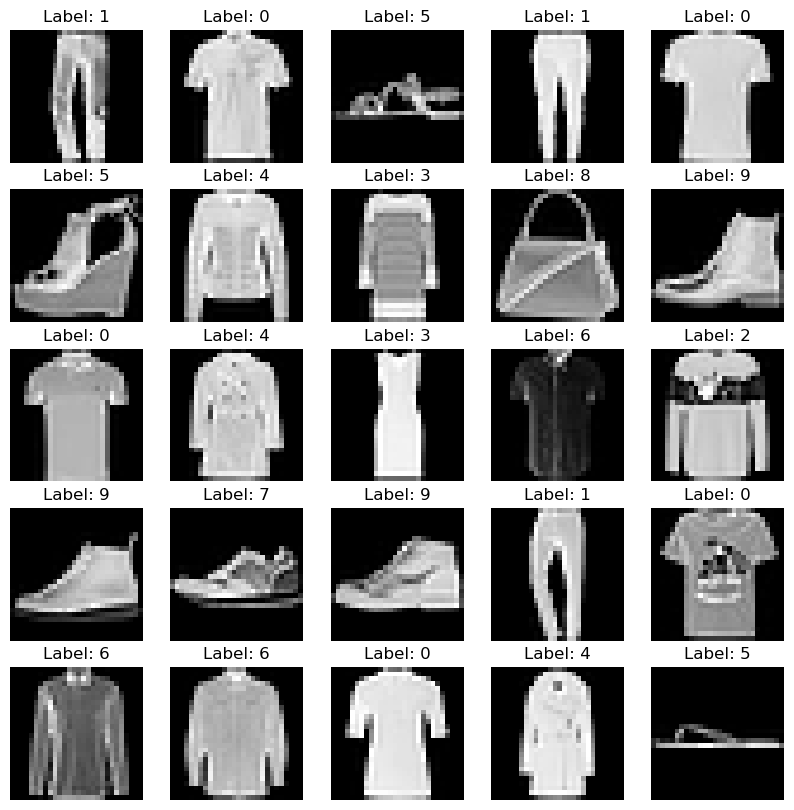

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Building CNN Model

## Model Architecture

In [12]:
# Initialize the model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))

# Flattening the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

## Compile the model

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model summary

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

## Training

In [15]:
# Set the training parameters
epochs = 10
batch_size = 64

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6223 - loss: 1.0191 - val_accuracy: 0.8271 - val_loss: 0.4598
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8236 - loss: 0.4871 - val_accuracy: 0.8662 - val_loss: 0.3676
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.8584 - loss: 0.3989 - val_accuracy: 0.8831 - val_loss: 0.3260
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8766 - loss: 0.3496 - val_accuracy: 0.8867 - val_loss: 0.3178
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8870 - loss: 0.3132 - val_accuracy: 0.8971 - val_loss: 0.2892
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.8969 - loss: 0.2881 - val_accuracy: 0.8976 - val_loss: 0.2788
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9035 - loss: 0.2676 - val_accuracy: 0.9007 - val_loss: 0.2705
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9115 - loss: 0.2427 - 

## Monitoring model performance

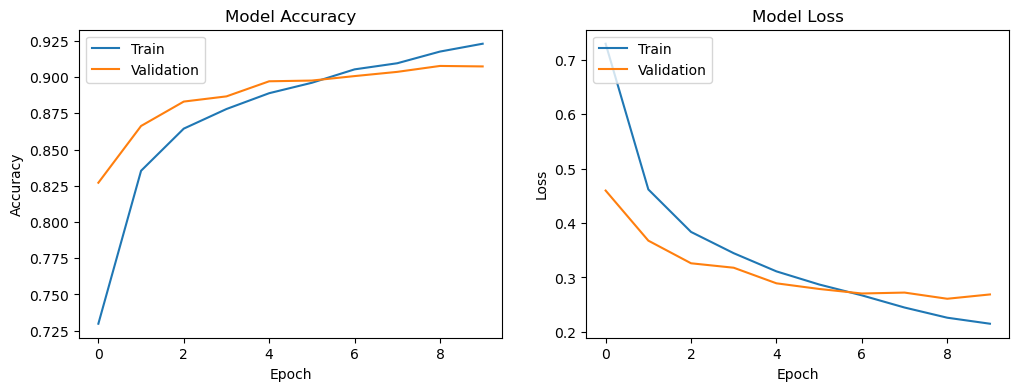

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Model Evaluation

## Evaluate the model on the test set

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

375/375 - 2s - 5ms/step - accuracy: 0.9061 - loss: 0.2652
Test Accuracy: 90.61%
Test Loss: 0.2652


## Generate a Confusion Matrix and Classification Report

### Predict the labels for the test set

In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


### Confusion Matrix

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1029    0   27   26    5    0  136    0    9    0]
 [   1 1146    1   23    1    0    1    0    1    0]
 [   8    0 1059   11   61    0   59    0    2    0]
 [  21    6   12 1131   48    0   22    0    2    0]
 [   2    2   63   31 1046    0   39    0    2    0]
 [   1    0    0    0    0 1109    0   20    0   11]
 [ 114    2  107   25  119    0  862    0   14    0]
 [   0    0    0    0    0   17    0 1191    1   15]
 [   1    0    4    1    2    2    5    0 1134    0]
 [   0    0    0    0    0    6    0   37    1 1166]]


### Visualize the confusion matrix as a heatmap

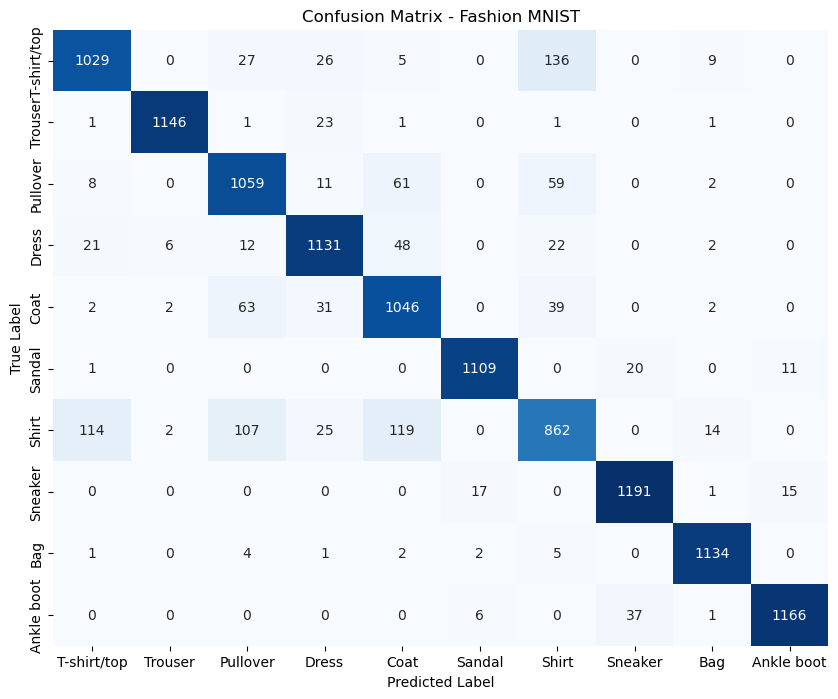

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], 
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion MNIST')

# Show the plot
plt.show()

### Classification Report

In [21]:
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1232
           1       0.99      0.98      0.98      1174
           2       0.83      0.88      0.86      1200
           3       0.91      0.91      0.91      1242
           4       0.82      0.88      0.85      1185
           5       0.98      0.97      0.97      1141
           6       0.77      0.69      0.73      1243
           7       0.95      0.97      0.96      1224
           8       0.97      0.99      0.98      1149
           9       0.98      0.96      0.97      1210

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



# Save the Trained Model

In [22]:
model.save('fashion_mnist_model.h5')

# Save the Training History

In [23]:
import pickle

with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)